In [1]:
'''Dataset used CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html)'''
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

'''load CIFAR-10'''
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

'''preprocess data'''
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [2]:
import numpy as np

'''prepare dataset for 2 tasks'''
def create_subdataset(dataset_x,dataset_y,indices):
    x=[]
    y=[]
    for i in indices:
        x.extend(dataset_x[dataset_y.flatten() == i])
        y.extend(dataset_y[dataset_y.flatten() == i])
    return (np.array(x),np.array(y))

class_indices_task1=[0, 1]
class_indices_task2=[2, 3]

'''Task1 dataset'''
(x_train_task1, y_train_task1)=create_subdataset(x_train,y_train,class_indices_task1)
(x_test_task1, y_test_task1)=create_subdataset(x_test,y_test,class_indices_task1)

'''Task 2 dataset'''
(x_train_task2, y_train_task2)=create_subdataset(x_train,y_train,class_indices_task2)
(x_test_task2, y_test_task2)=create_subdataset(x_test,y_test,class_indices_task2)

print(x_train_task1.shape, y_train_task1.shape)
print(x_test_task1.shape, y_test_task1.shape)

print(x_train_task2.shape, y_train_task2.shape)
print(x_test_task2.shape, y_test_task2.shape)

(10000, 32, 32, 3) (10000, 1)
(2000, 32, 32, 3) (2000, 1)
(10000, 32, 32, 3) (10000, 1)
(2000, 32, 32, 3) (2000, 1)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv5_block3_1_conv (Conv2D)   (None, None, None,   1049088     ['conv5_block2_out[0][0]']       
                                512)                                                              
                                                                                                  
 conv5_block3_1_bn (BatchNormal  (None, None, None,   2048       ['conv5_block3_1_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, None, None,   0          ['conv5_block3_1_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block3_1_relu[0][0]']    
          

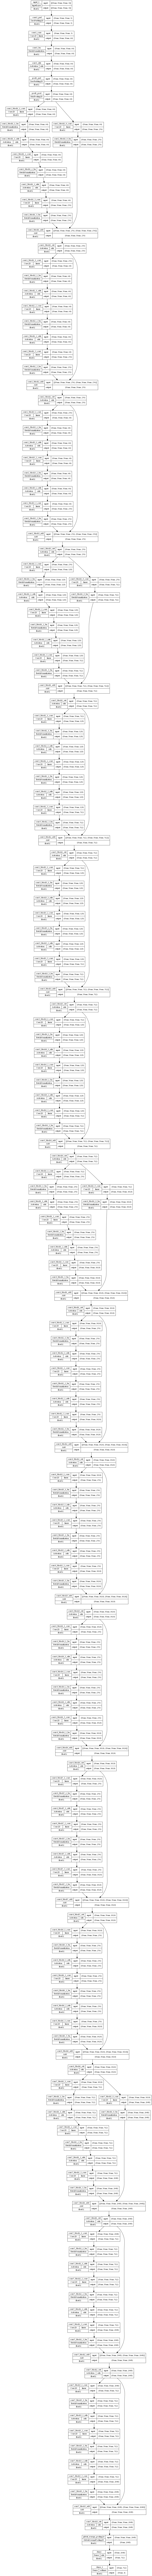

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input

'''define a model'''
def Resnet_50(classes=4):
    base_model = ResNet50(weights=None, include_top=False)
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)  # Add a global spatial average pooling layer
    x = Dense(512, activation='relu')(x)  # Add a fully-connected layer
    predictions = Dense(classes, activation='softmax')(x)  # 4-class softmax layer

    # This is the model we'll train
    model = Model(inputs=base_model.input, outputs=predictions)
    return model

model=Resnet_50(4)
model.summary()    
plot_model(model,show_shapes=True, show_dtype=True, show_layer_names=True, show_layer_activations=True)

In [4]:
'''Task 1 training'''
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
h = model.fit(
    x_train_task1, 
    y_train_task1,
    validation_data=(x_test_task1, y_test_task1),
    epochs=epochs, 
    batch_size=32
    )

Epoch 1/10
313/313 [==============================] - 20s 35ms/step - loss: 0.7041 - accuracy: 0.8001 - val_loss: 0.5033 - val_accuracy: 0.7545
Epoch 2/10
313/313 [==============================] - 10s 32ms/step - loss: 0.3256 - accuracy: 0.8684 - val_loss: 0.2617 - val_accuracy: 0.8935
Epoch 3/10
313/313 [==============================] - 10s 32ms/step - loss: 0.2440 - accuracy: 0.9042 - val_loss: 0.2906 - val_accuracy: 0.8765
Epoch 4/10
313/313 [==============================] - 10s 32ms/step - loss: 0.1954 - accuracy: 0.9217 - val_loss: 0.3100 - val_accuracy: 0.8795
Epoch 5/10
313/313 [==============================] - 10s 32ms/step - loss: 0.1484 - accuracy: 0.9446 - val_loss: 0.2167 - val_accuracy: 0.9270
Epoch 6/10
313/313 [==============================] - 10s 32ms/step - loss: 0.1202 - accuracy: 0.9536 - val_loss: 0.1908 - val_accuracy: 0.9245
Epoch 7/10
313/313 [==============================] - 10s 33ms/step - loss: 0.1064 - accuracy: 0.9576 - val_loss: 0.4145 - val_accuracy:

In [5]:
from tensorflow.keras.models import save_model
save_model(model, "Resnet_50_CIFAR10.hp5", save_format="h5")

In [4]:
'''Test Task 01'''
x_test_all=np.concatenate((x_test_task1,x_test_task2))
y_test_all=np.concatenate((y_test_task1,y_test_task2))

print(x_test_all.shape)
print(y_test_all.shape)

(4000, 32, 32, 3)
(4000, 1)


In [5]:
from tensorflow.keras.models import load_model

model=load_model("Resnet_50_CIFAR10.hp5")

BS=32
y_pred_prob_task1 = model.predict(x_test_task1,batch_size=BS)
print(y_pred_prob_task1)

BS=32
y_pred_prob_all = model.predict(x_test_all,batch_size=BS)
print(y_pred_prob_all)

63/63 [==============================] - 3s 7ms/step
[[9.8393446e-01 1.6065376e-02 1.2684883e-07 2.7071032e-08]
 [9.9845743e-01 1.5425266e-03 9.7955900e-11 2.7306985e-12]
 [9.9874663e-01 1.2533045e-03 3.8882782e-11 9.2079556e-13]
 ...
 [4.7561302e-04 9.9952435e-01 1.4171649e-12 9.8336070e-15]
 [1.8544168e-04 9.9981457e-01 2.4341763e-14 9.3116866e-17]
 [3.9998543e-02 9.5999366e-01 6.3017956e-06 1.4938898e-06]]
125/125 [==============================] - 1s 7ms/step
[[9.8393446e-01 1.6065376e-02 1.2684883e-07 2.7071032e-08]
 [9.9845743e-01 1.5425266e-03 9.7955900e-11 2.7306985e-12]
 [9.9874663e-01 1.2533045e-03 3.8882782e-11 9.2079556e-13]
 ...
 [2.8328070e-01 7.1602875e-01 2.5393578e-04 4.3667865e-04]
 [7.0710316e-02 9.2925894e-01 2.1463296e-05 9.3146846e-06]
 [8.3307189e-01 1.6680194e-01 4.9420138e-05 7.6761171e-05]]


In [6]:
def class_encode(mat):
    l=[]
    for row in mat:
        k=np.array(np.argmax(row))
        l.append(k)
    return np.array(l)

y_pred_task1=class_encode(y_pred_prob_task1)
y_pred_all=class_encode(y_pred_prob_all)
print(y_pred_task1.shape)
print(y_pred_all.shape)

(2000,)
(4000,)


In [8]:
from sklearn import metrics
'''Display the classification report for task1'''
print("\nClassification Report Task 1")
print(metrics.classification_report(y_test_task1.flatten(),y_pred_task1))
print("\nClassification Report all classes")
print(metrics.classification_report(y_test_all.flatten(),y_pred_all))


Classification Report Task 1
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1000
           1       0.91      0.95      0.93      1000

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000


Classification Report all classes
              precision    recall  f1-score   support

           0       0.40      0.91      0.55      1000
           1       0.56      0.95      0.70      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000

    accuracy                           0.46      4000
   macro avg       0.24      0.46      0.31      4000
weighted avg       0.24      0.46      0.31      4000



C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Confusion Matrix:


Text(0.5, 23.52222222222222, 'Predicted label')

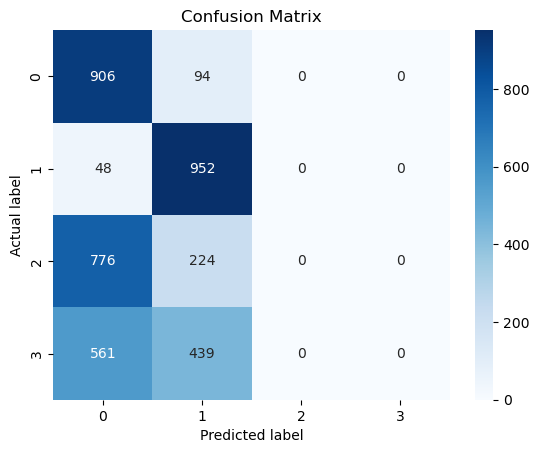

In [10]:
# Display the confusion matrix
import pandas as pd
print("\nConfusion Matrix:")
cm=metrics.confusion_matrix(y_test_all.flatten(),y_pred_all)

import matplotlib.pyplot as plt
import seaborn as sns

class_names = ["0","1","2","3"]
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
# Create a heatmap from the dataframe
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
'''Demonstration of Catastrophic forgetting when trained directly on Task 2 without Continual Learning'''

model=load_model("Resnet_50_CIFAR10.hp5")
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs = 10
h = model.fit(
    x_train_task2, 
    y_train_task2,
    validation_data=(x_test_task2, y_test_task2),
    epochs=epochs, 
    batch_size=32
    )

from tensorflow.keras.models import save_model
save_model(model, "Resnet_50_CIFAR10_2.hp5", save_format="h5")

Epoch 1/10
313/313 [==============================] - 14s 35ms/step - loss: 0.8227 - accuracy: 0.6741 - val_loss: 0.7987 - val_accuracy: 0.6780
Epoch 2/10
313/313 [==============================] - 10s 32ms/step - loss: 0.4805 - accuracy: 0.7811 - val_loss: 0.5972 - val_accuracy: 0.7200
Epoch 3/10
313/313 [==============================] - 10s 32ms/step - loss: 0.4322 - accuracy: 0.8041 - val_loss: 0.6757 - val_accuracy: 0.7315
Epoch 4/10
313/313 [==============================] - 10s 32ms/step - loss: 0.3853 - accuracy: 0.8333 - val_loss: 0.4611 - val_accuracy: 0.7925
Epoch 5/10
313/313 [==============================] - 10s 32ms/step - loss: 0.3637 - accuracy: 0.8404 - val_loss: 0.4931 - val_accuracy: 0.7735
Epoch 6/10
313/313 [==============================] - 10s 33ms/step - loss: 0.3227 - accuracy: 0.8666 - val_loss: 0.6547 - val_accuracy: 0.7170
Epoch 7/10
313/313 [==============================] - 10s 32ms/step - loss: 0.2919 - accuracy: 0.8823 - val_loss: 0.6088 - val_accuracy:

In [11]:
from tensorflow.keras.models import load_model

model=load_model("Resnet_50_CIFAR10_2.hp5")

BS=32
y_pred_prob_task1 = model.predict(x_test_task1,batch_size=BS)
print(y_pred_prob_task1)

BS=32
y_pred_prob_task2 = model.predict(x_test_task2,batch_size=BS)
print(y_pred_prob_task2)

BS=32
y_pred_prob_all = model.predict(x_test_all,batch_size=BS)
print(y_pred_prob_all)

63/63 [==============================] - 1s 6ms/step
[[4.7890889e-04 3.5468387e-04 4.7121102e-01 5.2795535e-01]
 [5.2448275e-04 3.8835887e-04 4.5014974e-01 5.4893744e-01]
 [3.1588893e-21 8.1923743e-22 9.9991298e-01 8.7024855e-05]
 ...
 [2.6143809e-07 1.2946357e-07 1.1817804e-02 9.8818177e-01]
 [9.2636992e-06 5.5007436e-06 5.4517269e-02 9.4546801e-01]
 [1.5025707e-04 1.0739649e-04 7.1424508e-01 2.8549722e-01]]
63/63 [==============================] - 0s 6ms/step
[[5.8199603e-05 4.0541236e-05 7.9858422e-01 2.0131706e-01]
 [5.6535256e-08 2.5928690e-08 6.2110582e-03 9.9378878e-01]
 [5.9576155e-06 3.9547731e-06 8.9374173e-01 1.0624838e-01]
 ...
 [2.0798823e-12 5.5096471e-13 1.2742472e-04 9.9987257e-01]
 [1.8903614e-07 9.2000136e-08 1.0209404e-02 9.8979038e-01]
 [3.0426222e-09 1.2036759e-09 1.8940801e-03 9.9810588e-01]]
125/125 [==============================] - 1s 6ms/step
[[4.78908885e-04 3.54683871e-04 4.71211016e-01 5.27955353e-01]
 [5.24482748e-04 3.88358865e-04 4.50149745e-01 5.4893744

In [12]:
y_pred_task1=class_encode(y_pred_prob_task1)
y_pred_task2=class_encode(y_pred_prob_task2)
y_pred_all=class_encode(y_pred_prob_all)
print(y_pred_task1.shape)
print(y_pred_task2.shape)
print(y_pred_all.shape)

(2000,)
(2000,)
(4000,)


In [13]:
from sklearn import metrics
'''Display the classification report with catastrophic forgetting'''
print("\nClassification Report Task 1 with catastrophic forgetting")
print(metrics.classification_report(y_test_task1.flatten(),y_pred_task1))
print("\nClassification Report Task 2")
print(metrics.classification_report(y_test_task2.flatten(),y_pred_task2))
print("\nClassification Report all classes")
print(metrics.classification_report(y_test_all.flatten(),y_pred_all))


Classification Report Task 1 with catastrophic forgetting
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1000.0
           1       0.00      0.00      0.00    1000.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00    2000.0
   macro avg       0.00      0.00      0.00    2000.0
weighted avg       0.00      0.00      0.00    2000.0


Classification Report Task 2
              precision    recall  f1-score   support

           2       0.84      0.79      0.81      1000
           3       0.80      0.85      0.82      1000

    accuracy                           0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000


Classification Report all classes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
     

C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.


Confusion Matrix:


Text(0.5, 23.52222222222222, 'Predicted label')

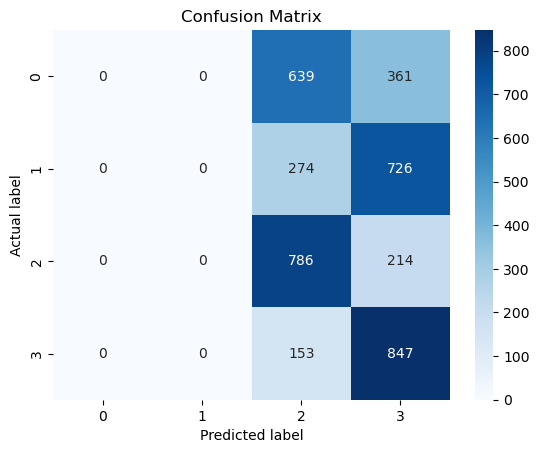

In [14]:
# Display the confusion matrix
import pandas as pd
print("\nConfusion Matrix:")
cm=metrics.confusion_matrix(y_test_all.flatten(),y_pred_all)

import matplotlib.pyplot as plt
import seaborn as sns

class_names = ["0","1","2","3"]
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
# Create a heatmap from the dataframe
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Continual Learning with memory augmentation

**1. Experience Replay Method**

In [15]:
'''Experience replay continual learning'''

'''prepare replay buffers'''
x_train_replay_buffer=x_train_task1[::5]#keep 20% subset of Task1 training data in memory while training on Task 2
y_train_replay_buffer=y_train_task1[::5]#keep 20% subset of Task1 training data in memory while training on Task 2

print(x_train_replay_buffer.shape)
print(y_train_replay_buffer.shape)
print(x_train_task2.shape)
print(y_train_task2.shape)

(2000, 32, 32, 3)
(2000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [16]:
'''prepare new dataset for task 2 by augmenting with replay buffers'''
x_train_exp_cl=np.concatenate((x_train_replay_buffer,x_train_task2))
y_train_exp_cl=np.concatenate((y_train_replay_buffer,y_train_task2))

In [37]:
from tensorflow.keras.optimizers import Adam

'''loading model trained on Task 1'''
model=load_model("Resnet_50_CIFAR10.hp5")
model.compile(optimizer=Adam(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

'''Train Experience Replay'''
epochs = 10
h = model.fit(
    x_train_exp_cl, 
    y_train_exp_cl,
    validation_data=(x_test_all, y_test_all),
    epochs=epochs, 
    batch_size=32
    )
from tensorflow.keras.models import save_model
save_model(model, "Resnet_50_CIFAR10_exp_cl.hp5", save_format="h5")


Epoch 1/10
417/417 [==============================] - 19s 37ms/step - loss: 0.9849 - accuracy: 0.5793 - val_loss: 1.7507 - val_accuracy: 0.4345
Epoch 2/10
417/417 [==============================] - 15s 36ms/step - loss: 0.7137 - accuracy: 0.7128 - val_loss: 1.0096 - val_accuracy: 0.6252
Epoch 3/10
417/417 [==============================] - 15s 36ms/step - loss: 0.6282 - accuracy: 0.7532 - val_loss: 0.9686 - val_accuracy: 0.6410
Epoch 4/10
417/417 [==============================] - 15s 35ms/step - loss: 0.5750 - accuracy: 0.7782 - val_loss: 0.6681 - val_accuracy: 0.7465
Epoch 5/10
417/417 [==============================] - 15s 35ms/step - loss: 0.5036 - accuracy: 0.8068 - val_loss: 0.7804 - val_accuracy: 0.7315
Epoch 6/10
417/417 [==============================] - 14s 34ms/step - loss: 0.4593 - accuracy: 0.8236 - val_loss: 0.7130 - val_accuracy: 0.7237
Epoch 7/10
417/417 [==============================] - 15s 35ms/step - loss: 0.4130 - accuracy: 0.8487 - val_loss: 0.6323 - val_accuracy:

In [17]:
'''Test experience Replay'''
from tensorflow.keras.models import load_model

model=load_model("Resnet_50_CIFAR10_exp_cl.hp5")

BS=32
y_pred_prob_task1 = model.predict(x_test_task1,batch_size=BS)
print(y_pred_prob_task1)

BS=32
y_pred_prob_task2 = model.predict(x_test_task2,batch_size=BS)
print(y_pred_prob_task2)

BS=32
y_pred_prob_all = model.predict(x_test_all,batch_size=BS)
print(y_pred_prob_all)

63/63 [==============================] - 1s 6ms/step
[[9.5911777e-01 1.1195014e-03 3.6929514e-02 2.8332721e-03]
 [2.6291020e-02 3.4258890e-03 7.8965044e-01 1.8063271e-01]
 [5.3991374e-02 3.2671090e-04 9.3590552e-01 9.7764665e-03]
 ...
 [1.0757275e-02 9.7085327e-01 1.2382032e-02 6.0073719e-03]
 [3.6695215e-04 9.9954778e-01 5.6029719e-05 2.9168334e-05]
 [3.4957609e-01 2.8073752e-01 1.3171217e-01 2.3797423e-01]]
63/63 [==============================] - 0s 6ms/step
[[3.29529936e-03 2.44035595e-03 6.32310569e-01 3.61953765e-01]
 [3.43183312e-03 5.82805183e-03 7.88806751e-02 9.11859453e-01]
 [4.06360690e-04 2.00648879e-04 9.71189320e-01 2.82037202e-02]
 ...
 [5.80508495e-05 1.30757671e-05 1.91135227e-03 9.98017550e-01]
 [1.13528986e-04 2.41853450e-05 2.03913194e-03 9.97823119e-01]
 [2.81048910e-04 9.89158652e-05 9.23098922e-01 7.65210688e-02]]
125/125 [==============================] - 1s 6ms/step
[[9.5911777e-01 1.1195014e-03 3.6929514e-02 2.8332721e-03]
 [2.6291020e-02 3.4258890e-03 7.8965

In [18]:
y_pred_task1=class_encode(y_pred_prob_task1)
y_pred_task2=class_encode(y_pred_prob_task2)
y_pred_all=class_encode(y_pred_prob_all)
print(y_pred_task1.shape)
print(y_pred_task2.shape)
print(y_pred_all.shape)

(2000,)
(2000,)
(4000,)


In [19]:
from sklearn import metrics
'''Display the classification report with Experience replay continual learning'''
print("\nClassification Report Task 1 with catastrophic forgetting")
print(metrics.classification_report(y_test_task1.flatten(),y_pred_task1))
print("\nClassification Report Task 2")
print(metrics.classification_report(y_test_task2.flatten(),y_pred_task2))
print("\nClassification Report all classes")
print(metrics.classification_report(y_test_all.flatten(),y_pred_all))


Classification Report Task 1 with catastrophic forgetting
              precision    recall  f1-score   support

           0       0.91      0.81      0.85      1000
           1       0.98      0.81      0.89      1000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.81      2000
   macro avg       0.47      0.40      0.44      2000
weighted avg       0.94      0.81      0.87      2000


Classification Report Task 2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.83      0.76      0.80      1000
           3       0.82      0.80      0.81      1000

    accuracy                           0.78      2000
   macro avg       0.41      0.39      0.40      2000
weighted avg       0.83      0.78      0.80      2000


Classification Report all classes
      

C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: Undefin


Confusion Matrix:


Text(0.5, 23.52222222222222, 'Predicted label')

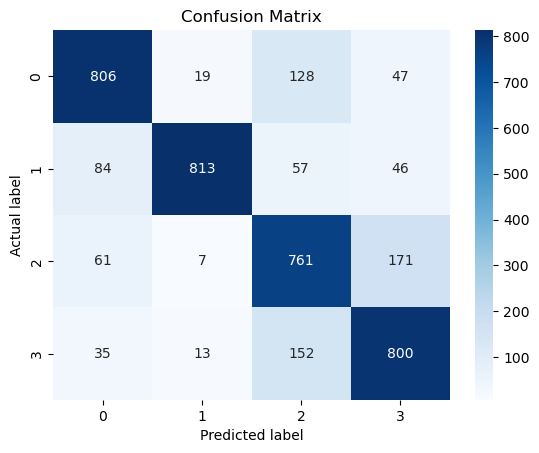

In [20]:
# Display the confusion matrix
import pandas as pd
print("\nConfusion Matrix:")
cm=metrics.confusion_matrix(y_test_all.flatten(),y_pred_all)

import matplotlib.pyplot as plt
import seaborn as sns

class_names = ["0","1","2","3"]
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
# Create a heatmap from the dataframe
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

We can see this experience replay based continious learning works well for both Task1 and Task 2

# Brief analysis of the model's performance and future improvements
**Task2 (identifying classes 2 & 3):**
the model performs similarly with experience replay to what it does without any memory augmentation during continiual learning

**Task1 (identifying classes 0 & 1)**
the performance of the model has slightly degraded as compared to its original performance (accuracy dropped from 93% to 81% due to driop in recall for each class) but the model retains most of its previous knowledge from Task 1 and also performs well on Task 2. 
Only 20% of the data from Task1 was used for creating the replay buffer.

**Improvements**
1. for a sequence of n_tasks the memory constraints for storing 20% of all previous data is a concern. Consequently we can use saliency augmented memory compkletion to store only the important features of the previous data and thus reduce memory footprint of replay buffers

2. In case data from previous tasks is not available we can use Elastic weight consolidation regularisation which I have implemented below but its is extremely computationally expensive for large models and large datasets. 

3. Alternately we can use knowledge distilaation from different layers from the old model to train the new model while also training it on the new dataset





# Appendix

**2. EWC**

In [17]:
'''Elastic weight consolidation continual learning'''

'''loading model trained on Task 1'''
model=load_model("Resnet_50_CIFAR10.hp5")

from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import backend as K

'''compute diagonal elements of fisher information matrix for each variable for memory limitations'''
def compute_fisher(model, data_loader):
    precision_matrices = {v.name: 0 for v in model.trainable_variables}
    loss_fn = SparseCategoricalCrossentropy()
    num_batches = 0

    for data, target in data_loader:
        with tf.GradientTape() as tape:
            output = model(data, training=False)
            loss = loss_fn(target, output)

        gradients = tape.gradient(loss, model.trainable_variables)

        for v, variable in enumerate(model.trainable_variables):
            fisher = tf.square(gradients[v])
            precision_matrices[variable.name] += fisher.numpy()

        num_batches += 1

    for name in precision_matrices:
        precision_matrices[name] /= num_batches

    return precision_matrices



'''Compute Fisher information matrix on Task1'''
dataset = tf.data.Dataset.from_tensor_slices((x_train_task1, y_train_task1)).batch(32)
fisher_information = compute_fisher(model, dataset)

display(fisher_information)

{'conv1_conv/kernel:0': array([[[[0.02361887, 0.00222516, 0.00442827, ..., 0.00164969,
           0.00288756, 0.00568138],
          [0.02292381, 0.00187117, 0.00390208, ..., 0.00138528,
           0.0026971 , 0.00589045],
          [0.02475996, 0.00206075, 0.00383559, ..., 0.00153888,
           0.00270664, 0.00631865]],
 
         [[0.03520725, 0.00221195, 0.00565664, ..., 0.00228265,
           0.00357412, 0.00517913],
          [0.03511196, 0.00185279, 0.00511825, ..., 0.00208525,
           0.00345584, 0.00546736],
          [0.03727786, 0.00201985, 0.00517054, ..., 0.00228926,
           0.0034299 , 0.00578176]],
 
         [[0.03434248, 0.00228343, 0.0057593 , ..., 0.00250949,
           0.00368989, 0.0047763 ],
          [0.03441555, 0.00193592, 0.00520932, ..., 0.00228952,
           0.00358603, 0.00510486],
          [0.03666167, 0.00204788, 0.00532225, ..., 0.0024911 ,
           0.00356248, 0.00542591]],
 
         ...,
 
         [[0.03038365, 0.0021864 , 0.00504864, ..., 

In [ ]:
import numpy as np
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import SparseCategoricalAccuracy

ewc_lambda = 0.5  # Coefficient for EWC regularization term

# Create a copy of the model's weights, which will serve as the "anchor" weights
anchor_weights = {v.name: v.numpy() for v in model.trainable_variables}

# Create optimizer, loss function, and metrics
optimizer = Adam()
loss_fn = SparseCategoricalCrossentropy()
train_acc_metric = SparseCategoricalAccuracy()
val_acc_metric = SparseCategoricalAccuracy()

'''dataset loader for Task2'''
dataset_train_task2 = tf.data.Dataset.from_tensor_slices((x_train_task2, y_train_task2)).batch(32)
dataset_val_task2 = tf.data.Dataset.from_tensor_slices((x_test_task2, y_test_task2)).batch(32)

'''train EWC'''
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        predictions = model(x, training=True)
        loss = loss_fn(y, predictions)
        for v in model.trainable_variables:
            if v.name in fisher_information:
                ewc_loss = tf.reduce_sum(fisher_information[v.name] * tf.square(v.value()- anchor_weights[v.name]))
                loss += ewc_lambda * ewc_loss
                
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    train_acc_metric.update_state(y, predictions)
    return loss

@tf.function
def test_step(x, y):
    val_predictions = model(x, training=False)
    loss = loss_fn(y, val_predictions)
    val_acc_metric.update_state(y, val_predictions)
    return loss

epochs = 10
for epoch in range(epochs):
    print(f"\nEpoch {epoch + 1}")

    # Training loop
    for step, (x_batch_train, y_batch_train) in enumerate(dataset_train_task2):
        train_loss = train_step(x_batch_train, y_batch_train)

        if step % 200 == 0:
            print(f"Training loss (for one batch) at step {step}: {float(train_loss)}")
            print(f"Seen so far: {(step + 1) * 32} samples")

    # Display metrics at the end of each epoch.
    train_acc = train_acc_metric.result()
    print(f"Training acc over epoch: {float(train_acc)}")

    # Reset training metrics at the end of each epoch
    train_acc_metric.reset_states()

    # Validation loop
    for x_batch_val, y_batch_val in dataset_val_task2:
        val_loss = test_step(x_batch_val, y_batch_val)

    val_acc = val_acc_metric.result()
    print(f"Validation acc: {float(val_acc)}")
    val_acc_metric.reset_states()

# Update anchor weights and fisher information for next task
# anchor_weights = {v.name: v.numpy() for v in model.trainable_variables}
# fisher_information = compute_fisher(model, dataset_train_task2)

# Save the final model
model.save("EWC_model_task2.h5")


Epoch 1
Training loss (for one batch) at step 0: 26.978443145751953
Seen so far: 32 samples
Training loss (for one batch) at step 200: 0.013200324028730392
Seen so far: 6432 samples


In [21]:
from tensorflow.keras.models import load_model

model=load_model("EWC_model_task2.h5")

BS=32
y_pred_prob_task1 = model.predict(x_test_task1,batch_size=BS)
print(y_pred_prob_task1)

BS=32
y_pred_prob_task2 = model.predict(x_test_task2,batch_size=BS)
print(y_pred_prob_task2)

BS=32
y_pred_prob_all = model.predict(x_test_all,batch_size=BS)
print(y_pred_prob_all)

63/63 [==============================] - 1s 6ms/step
[[1.7534554e-11 1.6997860e-11 5.0739865e-03 9.9492598e-01]
 [4.7901665e-11 4.6892091e-11 6.6321883e-03 9.9336785e-01]
 [1.8861950e-11 1.8244703e-11 5.1291627e-03 9.9487090e-01]
 ...
 [5.0163661e-11 4.9123646e-11 6.7117391e-03 9.9328822e-01]
 [4.9296012e-11 4.8267362e-11 6.6844807e-03 9.9331552e-01]
 [3.5512548e-11 3.4587229e-11 6.1159111e-03 9.9388403e-01]]
63/63 [==============================] - 0s 6ms/step
[[4.8396048e-11 4.7376231e-11 6.6504679e-03 9.9334949e-01]
 [3.2593886e-11 3.1767634e-11 5.9939227e-03 9.9400604e-01]
 [3.1594709e-11 3.0773124e-11 5.9384140e-03 9.9406153e-01]
 ...
 [2.8174178e-11 2.7410515e-11 5.7714377e-03 9.9422860e-01]
 [2.0733507e-11 2.0079587e-11 5.2752402e-03 9.9472469e-01]
 [4.8167401e-11 4.7132083e-11 6.6445167e-03 9.9335551e-01]]
125/125 [==============================] - 1s 6ms/step
[[1.7534554e-11 1.6997860e-11 5.0739865e-03 9.9492598e-01]
 [4.7901665e-11 4.6892091e-11 6.6321883e-03 9.9336785e-01]
 

In [22]:
y_pred_task1=class_encode(y_pred_prob_task1)
y_pred_task2=class_encode(y_pred_prob_task2)
y_pred_all=class_encode(y_pred_prob_all)
print(y_pred_task1.shape)
print(y_pred_task2.shape)
print(y_pred_all.shape)

(2000,)
(2000,)
(4000,)


In [23]:
from sklearn import metrics
'''Display the classification report with Experience replay continual learning'''
print("\nClassification Report Task 1")
print(metrics.classification_report(y_test_task1.flatten(),y_pred_task1))
print("\nClassification Report Task 2")
print(metrics.classification_report(y_test_task2.flatten(),y_pred_task2))
print("\nClassification Report all classes")
print(metrics.classification_report(y_test_all.flatten(),y_pred_all))


Classification Report Task 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00    1000.0
           1       0.00      0.00      0.00    1000.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00    2000.0
   macro avg       0.00      0.00      0.00    2000.0
weighted avg       0.00      0.00      0.00    2000.0


Classification Report Task 2
              precision    recall  f1-score   support

           2       0.00      0.00      0.00      1000
           3       0.50      1.00      0.67      1000

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.33      2000
weighted avg       0.25      0.50      0.33      2000


Classification Report all classes
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00 

C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Software\Anaconda3\lib\site-packages\sklearn\metrics\_classification.


Confusion Matrix:


Text(0.5, 23.52222222222222, 'Predicted label')

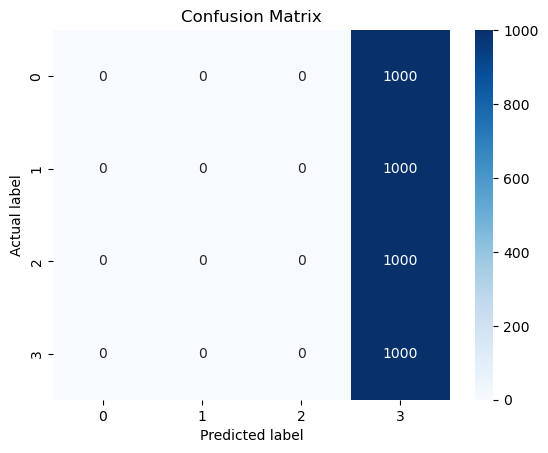

In [24]:
# Display the confusion matrix
import pandas as pd
print("\nConfusion Matrix:")
cm=metrics.confusion_matrix(y_test_all.flatten(),y_pred_all)

import matplotlib.pyplot as plt
import seaborn as sns

class_names = ["0","1","2","3"]
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
# Create a heatmap from the dataframe
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The training process with EWC is throwing out of memory error for calculating all fisher matrices for a model as big as Resnet50 so it is computationally very expensive